In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
import numpy as np
from qiskit.circuit.library import UnitaryGate


qreg_phi = QuantumRegister(5, 'phi')
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_phi, qreg_q, creg_c)

circuit.initialize(np.load('vector.npy'), qreg_phi)
U = np.load('matrix.npy')

# Start phase estimation for U = p(theta)

# Hadamard
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])

# Apply controlled U's
repetitions = 1
for i in range(5, 5+3):
    for rep in range(repetitions):
        circuit.append(UnitaryGate(U).control(1), [i, *qreg_phi])
    repetitions *= 2

# Uncompute QFT
circuit.h(qreg_q[2])

circuit.cp(-pi / 2, qreg_q[2], qreg_q[1])
circuit.h(qreg_q[1])

circuit.cp(-pi / 4, qreg_q[2], qreg_q[0])
circuit.cp(-pi / 2, qreg_q[1], qreg_q[0])
circuit.h(qreg_q[0])

# Swap qubits
circuit.swap(qreg_q[0], qreg_q[2])

circuit.measure(qreg_q, creg_c)

In [2]:
circuit.draw()

»
phi_0: »
       »
phi_1: »
       »
phi_2: »
       »
phi_3: »
       »
phi_4: »
       »
  q_0: »
       »
  q_1: »
       »
  q_2: »
       »
  c: 3/»
       »
«       ┌────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«phi_0: ┤0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ├»
«       │                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                │»
«phi_1: ┤1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ├»
«       │                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                │»
«phi_2: ┤2 Initialize(-0.16706-0.054246j,-0.040861+0.13959j,0.31899,0.11597-0.11472j,0.22101-0.032538j,0.15531-0.085656j,0.22248+0.014139j,0.094441-0.019757j,-0.18977-0.090292j,0.0074017+0.15396j,-0.042954-0.23451j,-0.023+0.12786j,0.044163+0.10639j,-0.23045+0.056985j,-0.09334-0.13531j,-0.057792+0.060754j,-0.028681+0.093435j,0.077567-0.0183j,-0.010393-0.19023j,0.03354+0.061919j,0.13233+0.23752j,0.18112+0.23108j,-0.085761+0.12596j,-0.1643-0.071791j,0.18182-0.015537j,0.059747-0.10181j,0.069651-0.083652j,-0.031101+0.14502j,-0.16772-0.051091j,-0.11482+0.022122j,-0.015917-0.18152j,0.03217-0.039286j) ├»
«       │                                                                                                                                                                                                           

In [3]:
from qiskit import *
simulator = Aer.get_backend("qasm_simulator")
job = execute(circuit, backend=simulator, shots=2**15)
result = job.result()
counts = result.get_counts()
print(counts)

{'010': 6054, '011': 3041, '111': 5960, '101': 2963, '100': 2295, '000': 5530, '001': 4098, '110': 2827}


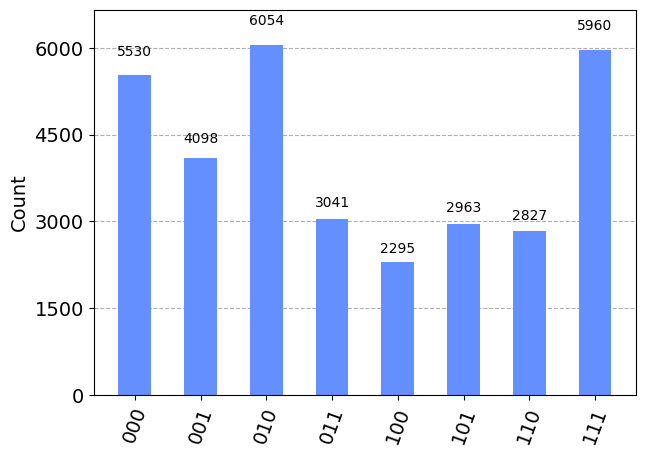

In [5]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)